In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体（比如SimHei适用于中文）
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False   # 解决负号显示问题


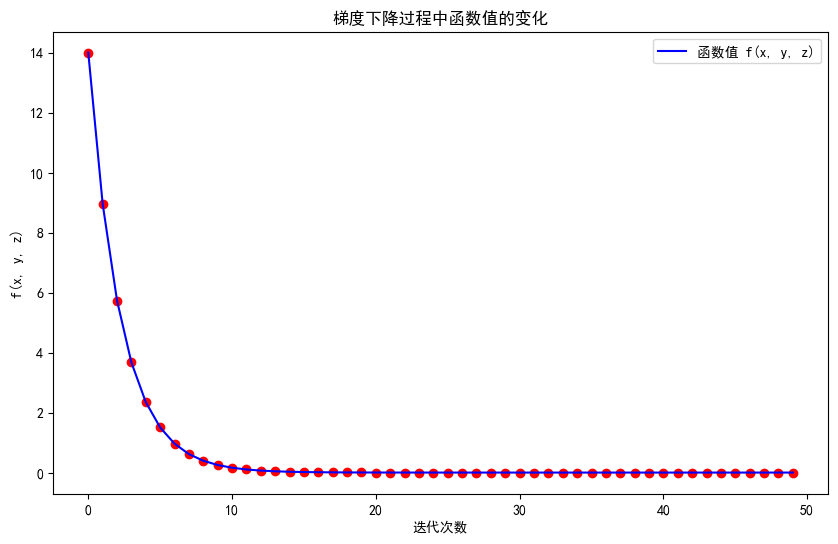

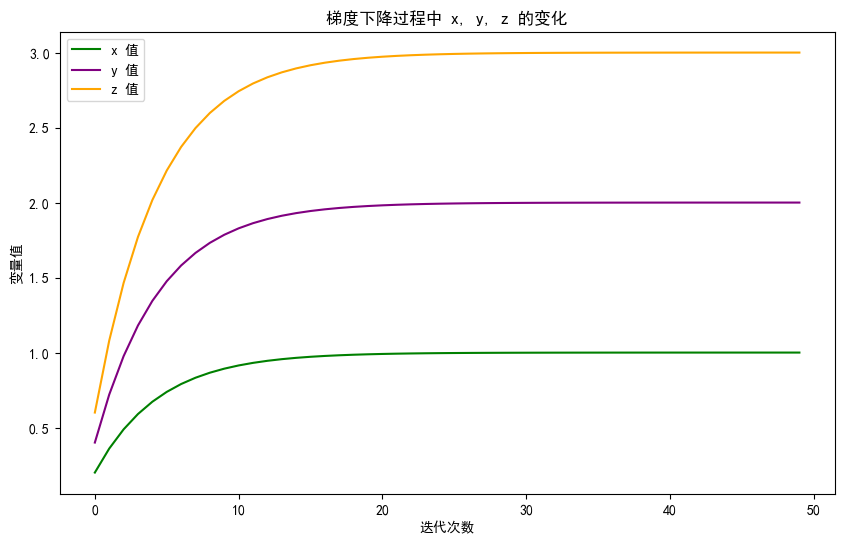

In [5]:
import torch
import matplotlib.pyplot as plt

# 定义简单的非负三元函数 f(x, y, z) = (x - 1)^2 + (y - 2)^2 + (z - 3)^2
def func(x, y, z):
    return (x - 1)**2 + (y - 2)**2 + (z - 3)**2

# 初始化变量
x = torch.tensor(0.0, requires_grad=True)
y = torch.tensor(0.0, requires_grad=True)
z = torch.tensor(0.0, requires_grad=True)

# 超参数：学习率和迭代次数
learning_rate = 0.1
iterations = 50

# 存储路径数据用于绘图
x_vals, y_vals, z_vals, func_vals = [], [], [], []

# 使用 SGD 优化器
optimizer = torch.optim.SGD([x, y, z], lr=learning_rate)

# 梯度下降迭代
for _ in range(iterations):
    optimizer.zero_grad()  # 清除梯度
    f = func(x, y, z)  # 计算函数值
    f.backward()  # 计算梯度
    optimizer.step()  # 更新变量

    # 记录当前值
    x_vals.append(x.item())
    y_vals.append(y.item())
    z_vals.append(z.item())
    func_vals.append(f.item())

# 绘制函数值收敛曲线
plt.figure(figsize=(10, 6))
plt.plot(func_vals, label="函数值 f(x, y, z)", color='blue')
plt.scatter(range(len(func_vals)), func_vals, color='red')
plt.title("梯度下降过程中函数值的变化")
plt.xlabel("迭代次数")
plt.ylabel("f(x, y, z)")
plt.legend()
plt.show()

# 绘制 x, y, z 的变化曲线
plt.figure(figsize=(10, 6))
plt.plot(x_vals, label="x 值", color='green')
plt.plot(y_vals, label="y 值", color='purple')
plt.plot(z_vals, label="z 值", color='orange')
plt.title("梯度下降过程中 x, y, z 的变化")
plt.xlabel("迭代次数")
plt.ylabel("变量值")
plt.legend()
plt.show()


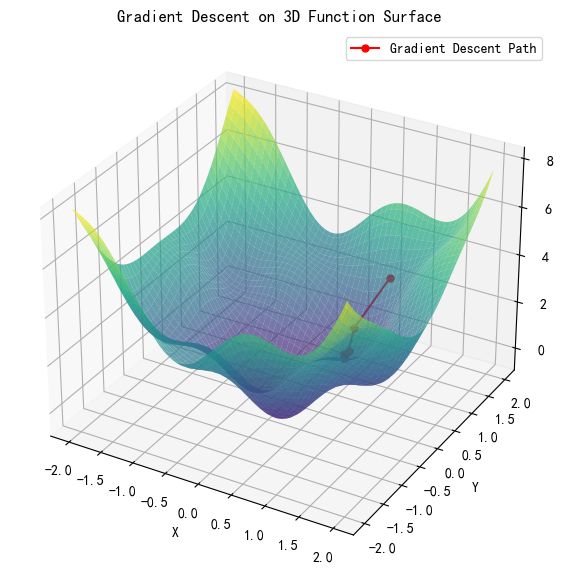

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义目标函数
def func(x, y):
    return x**2 + y**2 + np.sin(3 * x) * np.cos(3 * y)

# 转换为 Torch 版本的目标函数
def func_torch(x, y):
    return x**2 + y**2 + torch.sin(3 * x) * torch.cos(3 * y)

# 初始化 x 和 y
x = torch.tensor(1.5, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)

# 梯度下降参数
learning_rate = 0.1
iterations = 30

# 记录路径
path_x, path_y, path_z = [], [], []

# 优化过程
optimizer = torch.optim.SGD([x, y], lr=learning_rate)
for _ in range(iterations):
    optimizer.zero_grad()
    z = func_torch(x, y)
    z.backward()
    optimizer.step()

    path_x.append(x.item())
    path_y.append(y.item())
    path_z.append(z.item())

# 创建网格数据用于绘制曲面
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(X, Y)
Z = func(X, Y)

# 绘制三维曲面图和路径
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制目标函数的曲面
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# 绘制梯度下降的路径
ax.plot(path_x, path_y, path_z, color='red', marker='o', markersize=5, label="Gradient Descent Path")

# 设置轴标签
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()

plt.title("Gradient Descent on 3D Function Surface")
plt.show()
